### Модельный профиль

$$\xi_j = \xi(z_j) = \int_{0}^{h_{max}} m(z_j, h) \cdot n(h) \, dh 
+ \nu_j =
\sum_{i=0}^{N-1} \left[
m \left(z_j, \frac{h_{i+1} - h_i}{2} \right) 
\cdot 
n \left(\frac{h_{i+1} - h_i}{2}\right) \, \triangle h_i \right]
+ \nu_j $$

$$[h_0 = 0; \, h_N=h_{max}; \,
\triangle h_i = h_{i+1}-h_i]$$

In [1]:
import sys
import csv
import matplotlib.pyplot as plt
from pathlib import Path
sys.path.insert(1, '../scripts')

from direct_measurements import DirectMeasurements

In [2]:
dict_profile_time = {("06", "42"): "PM004A",
                     ("07", "05"): "PM004D",
                     ("07", "37"): "PM005A",
                     ("08", "08"): "PM005D",
                     ("09", "42"): "PM006A",
                     ("10", "13"): "PM006D",
                     ("11", "01"): "PM007A",
                     ("11", "27"): "PM007D",
                     ("13", "06"): "PM008A",
                     ("13", "23"): "PM008D",
                     ("16", "54"): "PM010A",
                     ("17", "17"): "PM010D",
                     ("17", "46"): "PM011A",
                     ("18", "04"): "PM011D"}

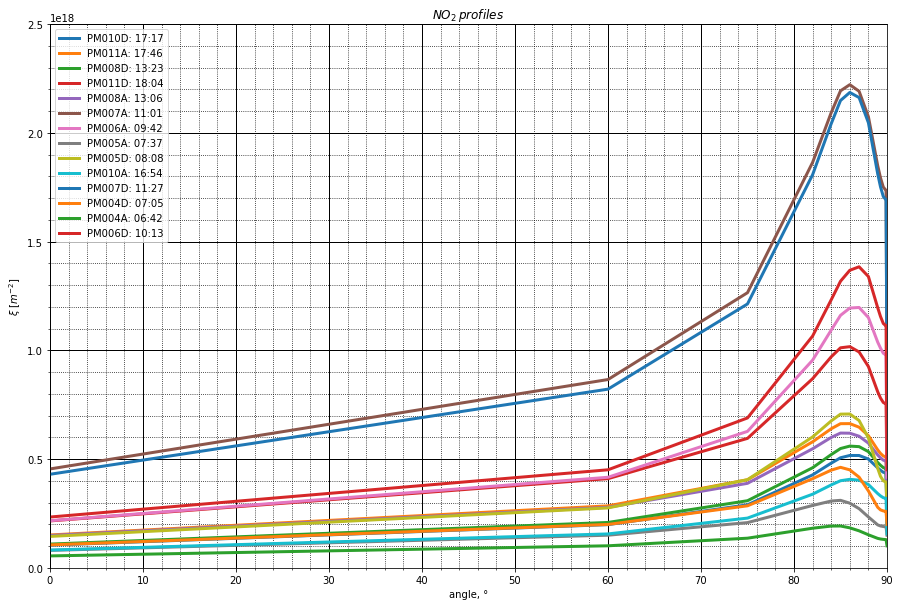

In [3]:
plt.figure(figsize=(15, 10))
for txt_path in Path(Path.cwd().parent, 
                     "data", "profiles_1", 
                     "csv").glob("*.csv"):
    with open(txt_path, "r") as csv_file:
        reader = csv.reader(csv_file)
        tup_coords: tuple[tuple[str]] = tuple(reader)
        plt.minorticks_on()
        plt.grid(which='major', color = 'k', linewidth = 1)
        plt.grid(which='minor', color = 'k', linestyle = ':')
        plt.xlim(0, 90)
        plt.ylim(0, 2.5*10**18)
        plt.xlabel("angle, °")
        plt.ylabel(r"$\xi$ [$m^{-2}$]")
        plt.title(r'$NO_2 \, profiles$')
        dir_meas = DirectMeasurements(txt_path.name)
        tup_dir_meas = dir_meas.direct_measurements_for_profile()
        list_text = txt_path.name.replace(".csv", "").split("_")
        plt.plot(tuple(float(x[0]) for x in tup_dir_meas), 
                 tuple(float(x[1]) for x in tup_dir_meas),
                 linewidth=3,
                 label=f"{dict_profile_time.get(tuple(list_text[1:]))}: {list_text[1]}:{list_text[2]}")
        plt.legend()
plt.show()